In [3]:
from VI_distributed import *
from env_frozen_lake import *
import time
%matplotlib inline
%load_ext autoreload

%autoreload 2


2019-07-25 20:15:16,330	WARNING worker.py:1337 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2019-07-25 20:15:16,334	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-25_20-15-16_333064_42317/logs.
2019-07-25 20:15:16,449	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:57155 to respond...
2019-07-25 20:15:16,576	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:23045 to respond...
2019-07-25 20:15:16,582	INFO services.py:806 -- Starting Redis shard with 3.26 GB max memory.
2019-07-25 20:15:16,612	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-07-25_20-15-16_333064_42317/logs.
2019-07-25 20:15:16,618	INFO services.py:1446 -- Starting the Plasma object store with 4.88 GB memory using /dev/shm.


In [4]:
map_size = 16
MAPMAP = MAPS["16x16"]

env = FrozenLakeEnv(desc =MAPMAP )
list_of_states = list(range(env.GetStateSpace()))
list_of_actions = list(range(env.GetActionSpace()))
reward_dict = {}
tran_dict = {}

# get transition dictionary 
for s in list_of_states:
    reward_dict[s] = {}
    tran_dict[s] = {}
    for a in list_of_actions:
        reward_dict[s][a]=env.TransitReward[s,a]
        tran_dict[s][a]={}
        successors = env.GetSuccessors(s,a)
        for ns, p in successors:
            tran_dict[s][a][ns] = p



#Solve using VI
st = time.time()
v, pi = fast_value_iteration_v2(list_of_states=list_of_states,
                            list_of_actions=list_of_actions,
                            reward_dict=reward_dict,
                            tran_dict=tran_dict,
                            beta=0.99,
                            epsilon=0.01,
                            workers_num=4)
v, pi =  list(v.values()), list(pi.values())
print("time taken:",time.time()-st)




Number of States 257
Number of transitions 514
Number of reward transitions 1028
Number of End States 85960.0
Error: 1000.0
Error: 1000.0
Error: 1000.0
Error: 1000.0
Error: 198.792
Error: 99.891
Error: 99.891
Error: 692.7030000000001
Error: 30.353697000000007
Error: 98.89209
Error: 89.002881
Error: 548.522766
Error: 25.087080644999986
Error: 26.075815326000026
Error: 32.851413242999996
Error: 385.61622858000004
Error: 13.491474900849
Error: 25.621208897922017
Error: 170.61577128545397
Error: 285.808829256819
Error: 12.326043126749422
Error: 17.110526804517292
Error: 134.58700027799046
Error: 220.67233569971032
Error: 11.505765992650606
Error: 15.043647692836728
Error: 112.53080300374342
Error: 179.691216111401
Error: 11.361476991719272
Error: 13.921446408637976
Error: 120.32948556475823
Error: 172.3829620334701
Error: 11.089757676813662
Error: 12.632816100581906
Error: 112.45539701889383
Error: 158.8482759321001
Error: 10.936211404810983
Error: 11.181177109815508
Error: 129.90666512439

Error: 0.010699745102385805
Error: 0.003910203326483952
Error: 0.2851962905353105
Error: 0.07624545098011026
Error: 0.00867755139898918
Error: 0.0031304563650564887
Error: 0.24974099704311925
Error: 0.06114742725142719
Error: 0.006966855154018958
Error: 0.002524206347516156
Error: 0.20268809294162793
Error: 0.05226558701529882
Error: 0.00564258146823704
Error: 0.002019481929437461
Error: 0.17643271055268883
Error: 0.04182896412864068
Error: 0.004526007173069502
Error: 0.0016269656025542645
Error: 0.1429077457580945
Error: 0.035624702383316276
Error: 0.003661277935691487
Error: 0.0013008552281803532
Error: 0.12377817238493094
Error: 0.028585558354606633
Error: 0.002934318978304873
Error: 0.0010471902371023134
Error: 0.1000963747618755
Error: 0.024159941065576618
Error: 0.0023711145224183383
Error: 0.0008368300365759751
Error: 0.0863260884238457
Error: 0.01977005899287576
Error: 0.0018988853997825572
Error: 0.000673170879395002
Error: 0.0697142211766959
Error: 0.016312486978534935
Error:

In [5]:
import utils_directory as dh 
dh.makeDirectory("results")
dh.makeDirectory("results/frozen_lake/")
results_dir = "results/frozen_lake/"

Creation of the directory results failed
Successfully created the directory results/frozen_lake/ 


Creation of the directory results/frozen_lake/ failed

Average reward: 486.072

Avereage discounted reward: 259.5083917731099

State Value image view:



Best Q-value and Policy:



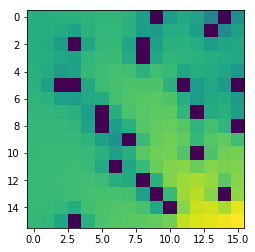

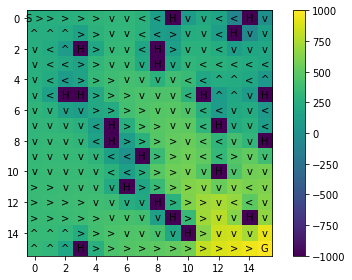

In [6]:
dh.makeDirectory(results_dir)
save_and_print_results(v,pi, MAP=MAPMAP,env= env, beta = 0.99,name="fastVI", results_dir = results_dir)